***Insights on Daily Public transport Services***

Import the necessary libraries

In [143]:
import pandas as pd
import matplotlib.pyplot as plt


load the dataset

In [144]:
df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")

In [145]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


data processing

In [146]:
df.isna().sum()

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

string date column to date format

In [147]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

Removing Null Values

In [148]:
df = df.dropna(inplace=False)

In [149]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2024-08-30,16436,10705,225,19026,3925,59.0
1,2023-09-15,15499,10671,267,18421,4519,61.0
2,2021-12-28,1756,2352,0,3775,0,13.0
3,2023-01-11,10536,8347,223,14072,0,48.0
4,2021-09-11,820,612,0,1283,0,11.0


Sorting to make a timeseries of data

In [150]:
df = df.sort_values("Date")
df.set_index("Date", inplace=True)

Contribution of Each service in total journeys

In [151]:
total_by_service = df.sum()
total_all = total_by_service.sum()
share = (total_by_service / total_all) * 100
print(share)


Local Route     30.663615
Light Rail      22.303936
Peak Service     0.556078
Rapid Route     39.035165
School           7.307103
Other            0.134102
dtype: float64


**1 .Local Route vs Rapid Route Journeys**

here, we analyze the daily public transport service data where plot the comparison between Local Route and Rapid Route journeys over time, from which we gain that the Rapid Route journeys consistently outnumber Local Route journeys, indicating a higher preference or demands.

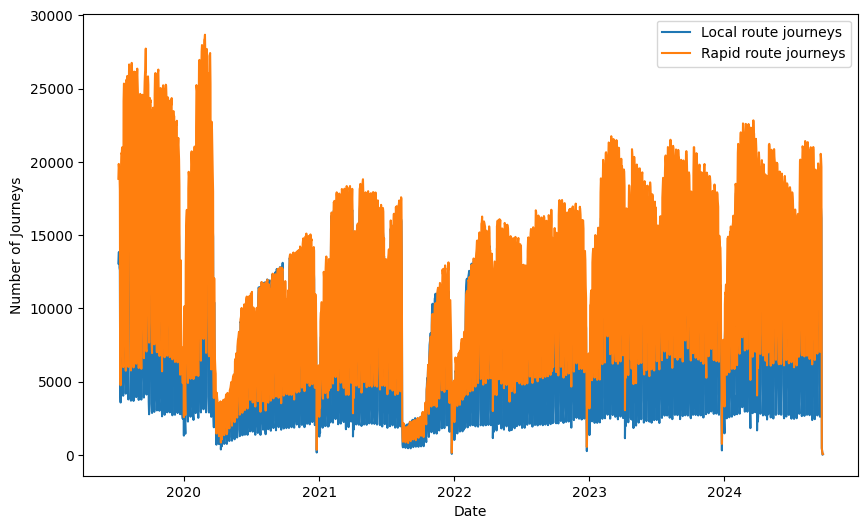

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Local Route"], label="Local route journeys")
plt.plot(df.index, df["Rapid Route"], label="Rapid route journeys")
plt.xlabel("Date")
plt.ylabel("Number of Journeys")
plt.legend()
plt.show()

**2 . Comparision of Mean and Standart deviation of Peak service and Rapid Route journeys**

here we find that the mean and standard deviation of Peak service journey are almost equal meaning the Peak Service demand is highly inconsistent and unpredictable but the Rapid Route journeys have a higher mean and lower standard deviation indicating a more consistent demand.

In [153]:
peak_mean = df["Peak Service"].mean()

peak_std = df["Peak Service"].std()
print("Peak Service - mean:", peak_mean, "std:", peak_std)

rapid_mean = df["Rapid Route"].mean()
rapid_std = df["Rapid Route"].std()
print("Rapid Route - mean:", rapid_mean, "std:", rapid_std)


Peak Service - mean: 179.92571127502634 std: 155.96239312140239
Rapid Route - mean: 12630.298735511064 std: 6675.828137454655


**3 .Shcool time analysis**

here we find that the school time journeys have a significant peak during the school start and end times, indicating that a large number of students rely on public transport for their daily commute to and from school.
also the month of july to nov have higher school tile journey and small in dec and jan due to continuous holidays

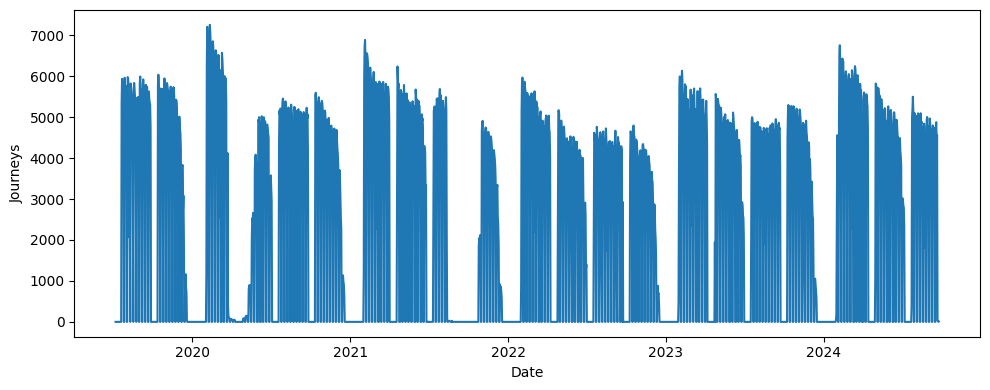

In [154]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df["School"])
plt.xlabel("Date")
plt.ylabel("Journeys")
plt.tight_layout()
plt.show()


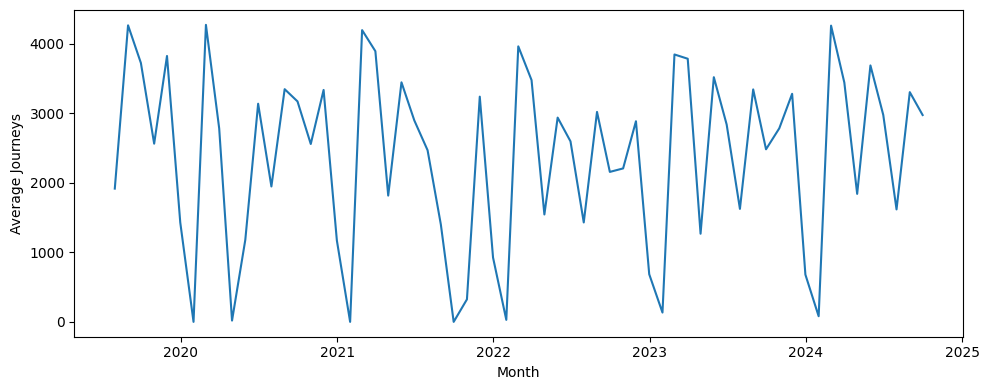

In [155]:
school = df["School"].copy()
school_monthly = school.resample("ME").mean()

plt.figure(figsize=(10,4))
plt.plot(school_monthly.index, school_monthly.values)
plt.xlabel("Month")
plt.ylabel("Average Journeys")
plt.tight_layout()
plt.show()


**4 .Visualizing all services over time**

Rapid Route consistently makes up the largest share of total journeys , showing it is the core service.The Local Route and Light Rail together form a stable secondary share with only small fluctuations. Peak Service and School contribute very little and vary irregularly, indicating occasional, situation-based use. Overall, even during disruptions, the relative mix of services stays largely stable. the other service journey give less contribution in total journey

In [156]:
service_cols = ["Local Route", "Light Rail", "Peak Service",
                "Rapid Route", "School", "Other"]

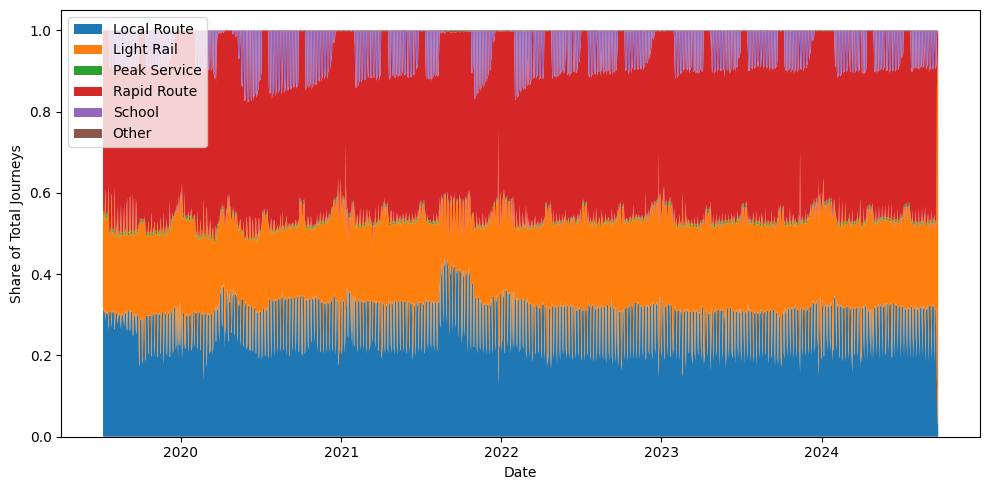

In [157]:
df_pct = df.div(df.sum(axis=1), axis=0)

plt.figure(figsize=(10,5))
plt.stackplot(
    df_pct.index,
    *[df_pct[col] for col in service_cols],
    labels=service_cols
)
plt.xlabel("Date")
plt.ylabel("Share of Total Journeys")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


**5 .Relation between Local and Rapid Route journeys**

the local and rapid route journey has a strong positive corelation , complement each other as part of the same transport system, and changes in total demand affect both at the same time.
so no trade off between the two services is observed.

In [158]:
corr = df["Local Route"].corr(df["Rapid Route"])
print("Correlation between Local Route and Rapid Route:", corr)


Correlation between Local Route and Rapid Route: 0.9647606004944502
